## Experiment 1
<br>
-- Numbers data with eye-blink removed vs Raw numbers data


In [1]:
import json
import utils
from data_handler import plot_images

import numpy as np
import pandas as pd

from collections import defaultdict
import json

from IPython.display import clear_output

2023-02-04 12:15:54.476916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 12:15:54.981455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-02-04 12:15:54.981501: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-02-04 12:15:54.981506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] 

### Data Load

In [2]:
data_path = '/home/donghyun/eye_writing_classification/v2_dataset/200_points_dataset/'

with open(data_path + 'eog_raw_numbers_200.json') as f:
  eog_raw_numbers = json.load(f)

with open(data_path + 'eog_eb_remove_numbers_200.json') as f:
  eog_eb_remove_numbers = json.load(f)

with open(data_path + 'reference_data_200.json') as f:
  reference_data = json.load(f)

### Experiment

In [ ]:
# 10 times experiments with raw numbers and eye-blink removed numbers data using HybridBaseModel

class Config:
    split_ratio = 0.3
    ref_key = 'numbers'
    batch_size = 18               # fix : Not must be equaled with number of test pairs 
    n_batch = 100
    lr = 0.001
    model_type = 'HybridBaseModel'
    epochs = 100

times = 10

raw_numbers_dict = defaultdict(list)
ebr_numbers_dict = defaultdict(list)
for t in range(times):
    print('times :', t+1)
    cfg = Config()
    
    _, ebr_train_acc, ebr_train_loss, ebr_test_acc = utils.experiment(cfg, eog_eb_remove_numbers, reference_data)
    _, raw_train_acc, raw_train_loss, raw_test_acc = utils.experiment(cfg, eog_raw_numbers, reference_data)

    ebr_numbers_dict[t] = [ebr_train_acc, ebr_train_loss, ebr_test_acc]
    raw_numbers_dict[t] = [raw_train_acc, raw_train_loss, raw_test_acc]


### Save

In [4]:
save_path = '/home/donghyun/eye_writing_classification/experiments/save/'

with open(save_path + 'ex1_raw_numbers_results.json', 'w') as f:
    json.dump(dict(raw_numbers_dict),f)

with open(save_path + 'ex1_eb_removed_numbers_results.json', 'w') as f:
    json.dump(dict(ebr_numbers_dict),f)

### Visualization

In [2]:
save_path = '/home/donghyun/eye_writing_classification/experiments/save/'

with open(save_path+'ex1_raw_numbers_results.json') as f:
    raw_numbers_results = json.load(f)

with open(save_path+'ex1_eb_removed_numbers_results.json') as f:
    ebr_numbers_results = json.load(f)


In [3]:
raw_test_acc = []
ebr_test_acc = []
for t in range(10):
    key = str(t)
    raw_test_acc.append(raw_numbers_results[key][2])
    ebr_test_acc.append(ebr_numbers_results[key][2])

raw_avg_results = np.array(raw_test_acc).mean(axis=0)
ebr_avg_results  =np.array(ebr_test_acc).mean(axis=0)

In [4]:
def analysis(data_list):
    return np.mean(data_list), max(data_list), min(data_list), np.std(data_list)

raw_numbers_test_performance = [t[-1] for t in raw_test_acc]
ebr_numbers_test_performance = [t[-1] for t in ebr_test_acc]

print('Accuracy with 10 repetitions')
print(' '*29 +'1,     2,    3,      4,      5,      6,     7,     8,     9,     10,       Avg.   Best.   Worst.  Std.')
print('without eye-blink removal : {}, {}'.format(raw_numbers_test_performance, analysis(raw_numbers_test_performance)))
print('with eye-blink removal    : {}, {}'.format(ebr_numbers_test_performance, analysis(ebr_numbers_test_performance)))

Accuracy with 10 repetitions
                             1,     2,    3,      4,      5,      6,     7,     8,     9,     10,       Avg.   Best.   Worst.  Std.
without eye-blink removal : [86.25, 90.0, 84.375, 88.125, 85.0, 89.375, 90.0, 86.875, 90.625, 89.375], (88.0, 90.625, 84.375, 2.125)
with eye-blink removal    : [89.375, 86.875, 91.875, 85.0, 83.75, 90.0, 88.75, 83.75, 90.0, 94.375], (88.375, 94.375, 83.75, 3.3330729064933458)


In [ ]:
raw_df = pd.DataFrame(columns=['timepoint', 'value'])
for data in raw_test_acc:
    for t, v in enumerate(data):
        raw_df.loc[len(raw_df)] = [int(t), v]

ebr_df = pd.DataFrame(columns=['timepoint', 'value'])
for data in ebr_test_acc:
    for t, v in enumerate(data):
        ebr_df.loc[len(ebr_df)] = [int(t), v]

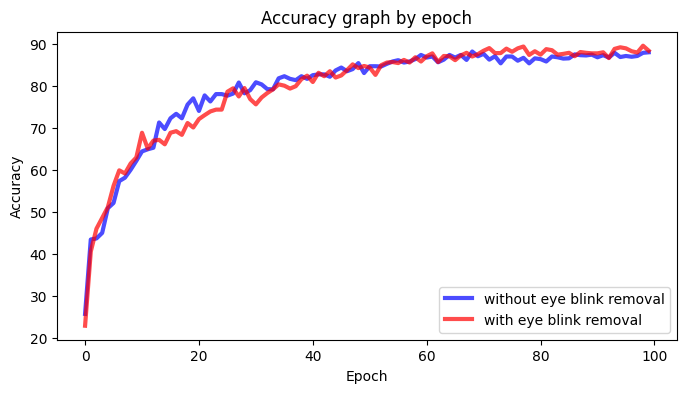

In [51]:
fig = plt.figure(figsize=(8,4))
fig.set_facecolor('white')

sns.lineplot(data=raw_avg_results, label='without eye blink removal', color='blue', alpha = 0.7, markers='o', linewidth=3)
sns.lineplot(data=ebr_avg_results, label='with eye blink removal',color='red', alpha = 0.7, markers='+', linewidth=3)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy graph by epoch')

plt.show()